# Ensambles de modelos

# Nuevo ensamble. 80a, 80b, 86a

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import os
import pandas as pd

# RUTA A TU CARPETA Predicciones EN COMPUTADORAS
ruta_zlgbm = "/content/drive/Other computers/Mi PC (W11)/AÑO 2025/2do Cuatrimestre/Economía y Finanzas/Competencia03/Predicciones"

predicciones = []

for archivo in os.listdir(ruta_zlgbm):
    if archivo.endswith(".txt"):
        df = pd.read_csv(os.path.join(ruta_zlgbm, archivo), sep="\t")
        df["modelo"] = archivo.replace(".txt", "")
        predicciones.append(df)

df_total = pd.concat(predicciones, ignore_index=True)
print(df_total)

nombres={'prediccion80b': '80b',
'prediccion80a': '80a',
'prediccion86a':'86a',
'prediccion86b':'86b',
'prediccion (v3 semillerio ENVIAR)':'IPC v3',
'prediccion (v8 semillerio comp03 ENVIAR 0.1 undersampling)':'IPC v8'
}

df_total['modelo'] = df_total['modelo'].map(nombres)

print(df_total)


        numero_de_cliente  foto_mes      prob  \
0               249221323    202109  0.015368   
1               249227600    202109  0.046283   
2               249234235    202109  0.158831   
3               249244449    202109  0.048859   
4               249244739    202109  0.109635   
...                   ...       ...       ...   
990553         1606453128    202109  0.074313   
990554         1606468081    202109  0.007901   
990555         1606514246    202109  0.076621   
990556         1606570831    202109  0.083956   
990557         1606633188    202109  0.072569   

                                                   modelo  
0       prediccion (v8 semillerio comp03 ENVIAR 0.1 un...  
1       prediccion (v8 semillerio comp03 ENVIAR 0.1 un...  
2       prediccion (v8 semillerio comp03 ENVIAR 0.1 un...  
3       prediccion (v8 semillerio comp03 ENVIAR 0.1 un...  
4       prediccion (v8 semillerio comp03 ENVIAR 0.1 un...  
...                                                

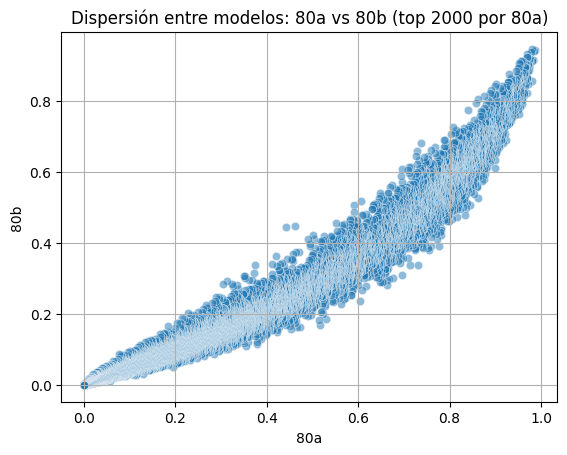

In [78]:
#Grafiquitos
import seaborn as sns
import matplotlib.pyplot as plt

#agrupo y hago la media
elegir = ['80a','86a','80b']
mis_ensambles = df_total[df_total['modelo'].isin(elegir)]

ensamble_final2 = mis_ensambles.groupby('numero_de_cliente', as_index=False)['prob'].mean()
ensamble_final2['modelo'] = 'ensamble1'
df_total2=pd.concat([df_total, ensamble_final2], ignore_index=True)
#ensamble_final2 = ensamble_final2.sort_values(by='prob', ascending=False).reset_index(drop=True)
#ensamble_final2

# Paso 1: seleccionar los dos modelos que querés comparar
modelo_x = '80a'
modelo_y = '80b'

# Paso 2: pivotear el DataFrame para tener columnas por modelo
df_pivot = df_total2.pivot_table(index='numero_de_cliente', columns='modelo', values='prob', aggfunc='mean')

# Paso 3: filtrar solo los dos modelos
df_dos = df_pivot[[modelo_x, modelo_y]].dropna()

# Paso 4: ordenar por el modelo base (por ejemplo, modelo_x) y tomar los primeros 2000
df_top = df_dos.sort_values(by=modelo_x, ascending=False)#.head(2000)

# Paso 5: graficar scatterplot
sns.scatterplot(data=df_top, x=modelo_x, y=modelo_y, alpha=0.5)
plt.title(f"Dispersión entre modelos: {modelo_x} vs {modelo_y} (top 2000 por {modelo_x})")
plt.xlabel(modelo_x)
plt.ylabel(modelo_y)
plt.grid(True)
plt.show()

In [79]:
#Tomo los modelos 86a, 80a, 86b


#agrupo y hago la media
elegir = ['86a','80a','80b' ]
mis_ensambles = df_total[df_total['modelo'].isin(elegir)]

ensamble_final2 = mis_ensambles.groupby('numero_de_cliente', as_index=False)['prob'].mean()
ensamble_final2 = ensamble_final2.sort_values(by='prob', ascending=False).reset_index(drop=True)
ensamble_final2

ensamble_final2['Prediccion'] = 0  # Inicializa todo a 0
ensamble_final2.loc[0:10999, 'Prediccion'] = 1
ensamble_final2 = ensamble_final2.loc[ensamble_final2['Prediccion']==1, ['numero_de_cliente']]
print(ensamble_final2.head(10))
print(ensamble_final2.shape)

ensamble_final2.to_csv('clientes_ensamble_86a_80a_80b.csv', index=False,header=False)

   numero_de_cliente
0         1199015824
1          749950074
2         1207248196
3          751249044
4          613194181
5         1090997571
6          952665644
7         1164784957
8          286028636
9          491664360
(11000, 1)
